<h1>Wine Reviews Data Analysis and Visualization</h1>
This data is from Kaggle and was scraped from <i>Wine Enthusiast</i> magazine in November 2017. <br>The dataset can be found here: <a> href=https://www.kaggle.com/zynicide/wine-reviews</a>.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [32]:
# create pandas dataframe
wine = pd.read_csv('wine_reviews.csv', encoding='latin-1')
wine.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÌÊ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin OÛªKeefe,@kerinokeefe,Nicosia 2013 VulkÌÊ Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineåÊ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineåÊ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [33]:
# number of observations
len(wine)

129971

In [35]:
# drop unnecessary columns
wine = wine.drop(columns=['Unnamed: 0','region_2', 'taster_twitter_handle'])
wine.head(2)

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÌÊ Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin OÛªKeefe,Nicosia 2013 VulkÌÊ Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [36]:
wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


<h3>We can see above that the wine in our dataset ranges in price from 4 dollars to 3300 dollars per bottle, with a mean price of around $35. Points range from 80-100.</h3>

In [37]:
# check for missing values
null_values = wine.isnull().values.any()
number_null = wine.isnull().sum()
number_null


country           63
description        0
designation    37465
points             0
price           8996
province          63
region_1       21247
taster_name    26244
title              0
variety            1
winery             0
dtype: int64

<h3>I don't plan to use designation for analysis. I will also drop region_1, since we have country and province.</h3>

In [38]:
wine = wine.drop(columns=['designation', 'region_1'])
wine.head(2)

,country,description,points,price,province,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Kerin OÛªKeefe,Nicosia 2013 VulkÌÊ Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [40]:
# check for duplicate entries
wine[wine.duplicated('description', keep = False)].sort_values('description').head(10)

,country,description,points,price,province,taster_name,title,variety,winery
67614,US,"100% Malbec, it's redolent with dark plums, wi...",87,20.0,Washington,Sean P. Sullivan,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,US,"100% Malbec, it's redolent with dark plums, wi...",87,20.0,Washington,Sean P. Sullivan,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
119702,US,"100% Sangiovese, this pale pink wine has notes...",88,18.0,Washington,Sean P. Sullivan,Ross Andrew 2013 Meadow RosÌ© (Columbia Valley...,RosÌ©,Ross Andrew
72181,US,"100% Sangiovese, this pale pink wine has notes...",88,18.0,Washington,Sean P. Sullivan,Ross Andrew 2013 Meadow RosÌ© (Columbia Valley...,RosÌ©,Ross Andrew
73731,France,"87-89 Barrel sample. A pleasurable, perfumed w...",88,NaN,Bordeaux,Roger Voss,ChÌ¢teau Lalande-Borie 2008 Barrel sample (Sa...,Bordeaux-style Red Blend,ChÌ¢teau Lalande-Borie
100745,France,"87-89 Barrel sample. A pleasurable, perfumed w...",88,NaN,Bordeaux,Roger Voss,ChÌ¢teau Lalande-Borie 2008 Barrel sample (Sa...,Bordeaux-style Red Blend,ChÌ¢teau Lalande-Borie
73730,France,87-89 Barrel sample. Minty aromas give lifted ...,88,NaN,Bordeaux,Roger Voss,ChÌ¢teau Haut-Sarpe 2008 Barrel sample (Saint...,Bordeaux-style Red Blend,ChÌ¢teau Haut-Sarpe
100744,France,87-89 Barrel sample. Minty aromas give lifted ...,88,NaN,Bordeaux,Roger Voss,ChÌ¢teau Haut-Sarpe 2008 Barrel sample (Saint...,Bordeaux-style Red Blend,ChÌ¢teau Haut-Sarpe
73729,France,87-89 Barrel sample. With its lovely fresh fru...,88,NaN,Bordeaux,Roger Voss,ChÌ¢teau Bertineau Saint-Vincent 2008 Barrel s...,Bordeaux-style Red Blend,ChÌ¢teau Bertineau Saint-Vincent
100743,France,87-89 Barrel sample. With its lovely fresh fru...,88,NaN,Bordeaux,Roger Voss,ChÌ¢teau Bertineau Saint-Vincent 2008 Barrel s...,Bordeaux-style Red Blend,ChÌ¢teau Bertineau Saint-Vincent


In [43]:
# drop duplicates
wine = wine.drop_duplicates('description')
len(wine)

119955

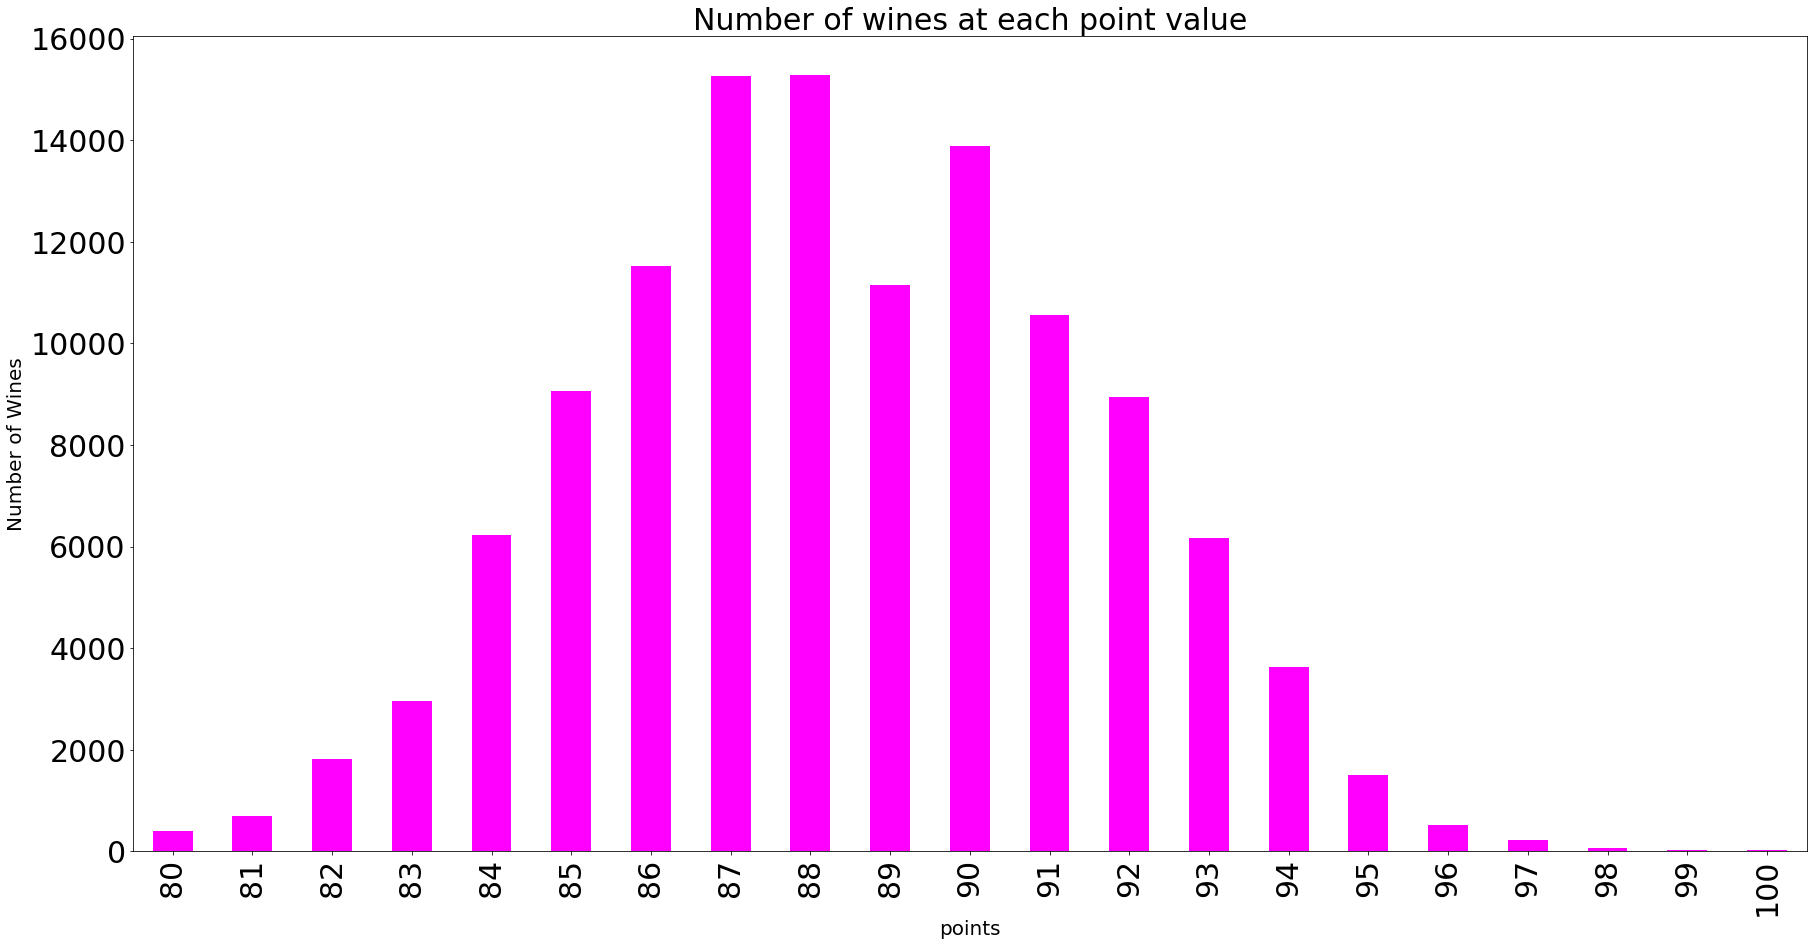

In [51]:
# plot distribution of wine by points
# create dataframe of points and description
df_points_desc = wine[['description', 'points']]

fig, ax = plt.subplots(figsize=(30,15))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.set_title('Number of wines at each point value', size=30)
ax.set_xlabel('Points', fontsize=20)
ax.set_ylabel('Number of Wines', fontsize=20)
df_points_desc.groupby(['points']).count()['description'].plot(ax=ax, kind='bar', color='magenta')

In [65]:
# create dataframe of descriptions and countries
df_country_desc = wine[['description', 'country']]

# remove rows with missing value for country
df_country_desc.dropna()

,description,country
0,"Aromas include tropical fruit, broom, brimston...",Italy
1,"This is ripe and fruity, a wine that is smooth...",Portugal
2,"Tart and snappy, the flavors of lime flesh and...",US
3,"Pineapple rind, lemon pith and orange blossom ...",US
4,"Much like the regular bottling from 2012, this...",US
...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,Germany
129967,Citation is given as much as a decade of bottl...,US
129968,Well-drained gravel soil gives this wine its c...,France
129969,"A dry style of Pinot Gris, this is crisp with ...",France


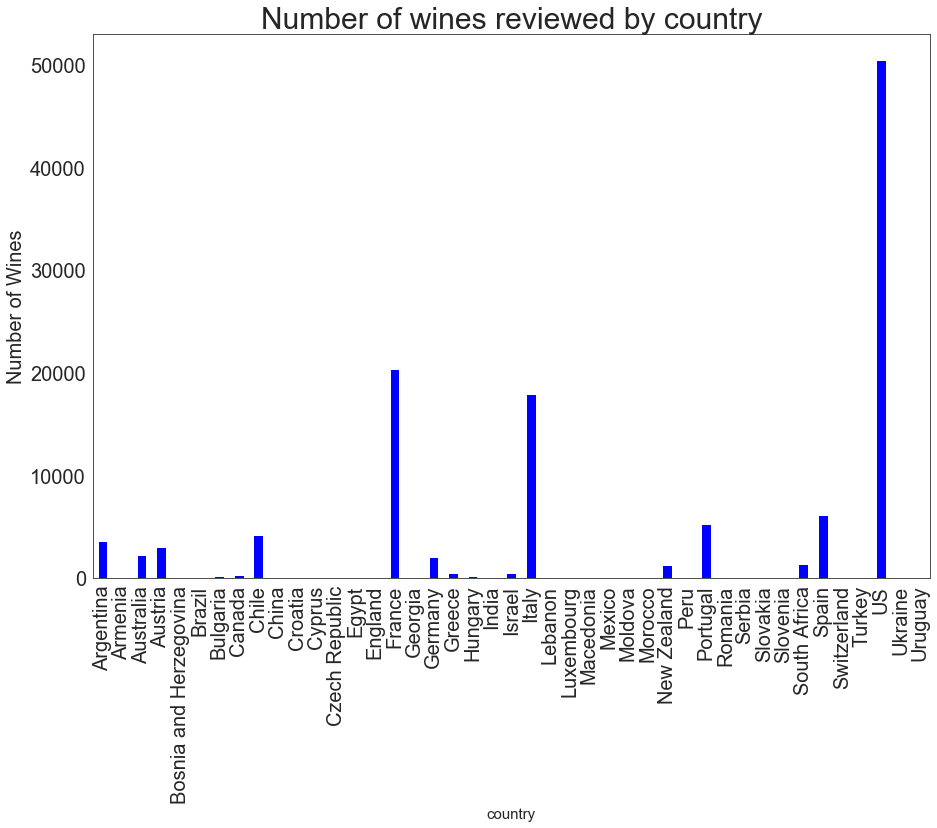

In [75]:
# Plot number of wines reviewed from each country

fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_title('Number of wines reviewed by country', size=30)
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel('Number of Wines', fontsize=20)
df_country_desc.groupby(['country']).count()['description'].plot(ax=ax, kind='bar', color='blue')
plt.show()


<h3>From the chart above, we can see that wines from the U.S. are overrepresented in this dataset.</h3>

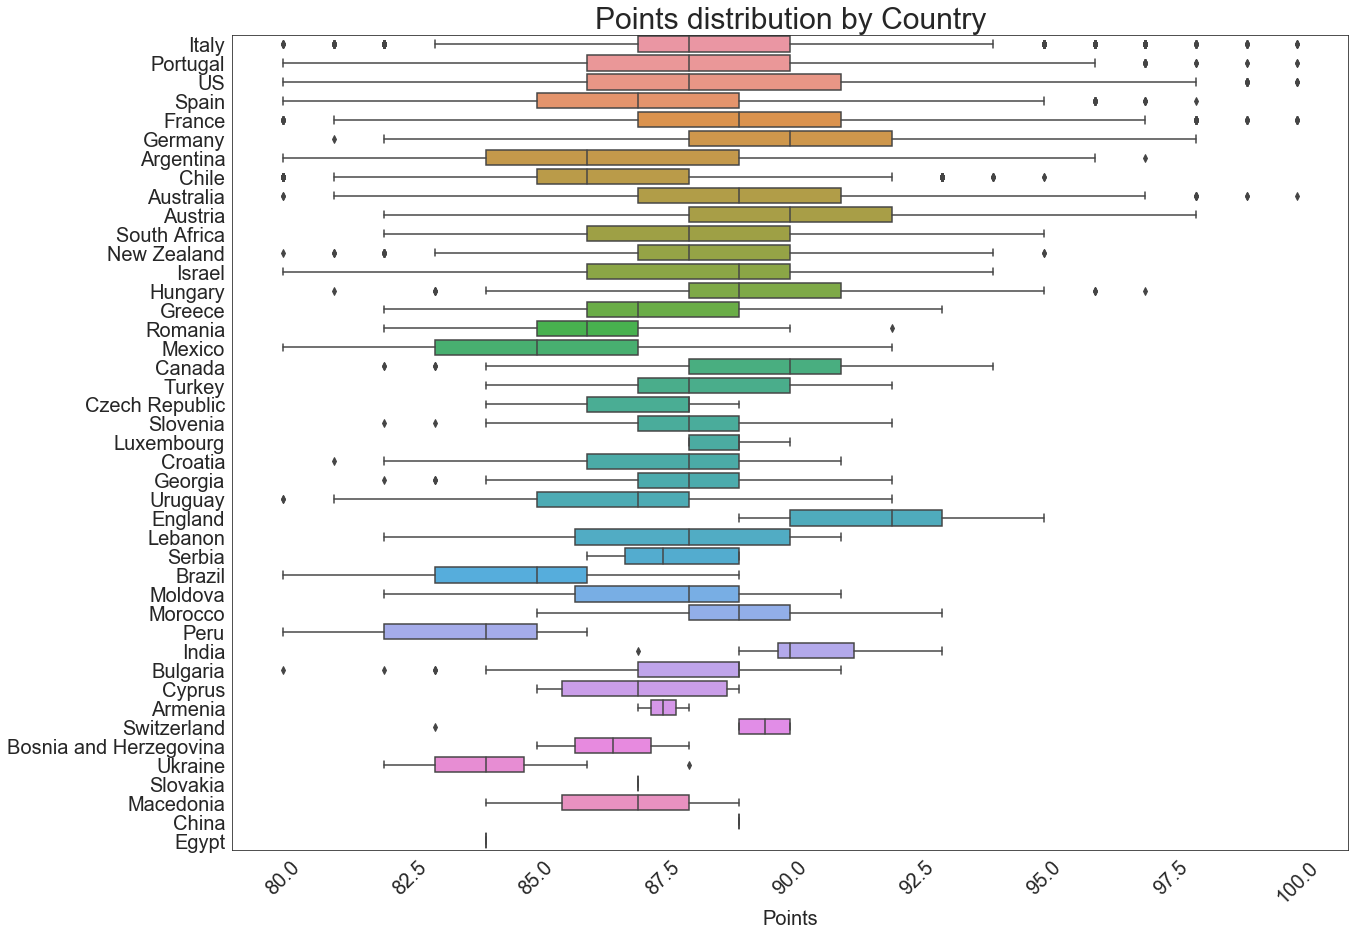

In [76]:
# Do wines from certain countries typically score higher?
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20,15))
chart = sns.boxplot(y='country', x='points', data=wine, ax=ax)
plt.xticks(rotation=45)
plt.title("Points distribution by Country", fontsize=30)
plt.xlabel('Points', fontsize=20)
plt.ylabel("", fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [104]:
# find average points by country
df_avg_points = wine.groupby('country', as_index=False)['points'].mean().sort_values(by = 'points', ascending = False)


# show countries with most expensive wine on average
df_avg_points.head(10)

,country,points
14,England,91.746032
20,India,90.250000
3,Austria,90.129575
17,Germany,89.895582
7,Canada,89.309735
19,Hungary,89.294574
9,China,89.000000
15,France,88.866444
24,Luxembourg,88.800000
28,Morocco,88.708333


<h5>Surprised to see England, India and Canada in the top 5.</h5>

In [105]:
df_avg_points.tail(10)

,country,points
42,Uruguay,86.663265
0,Argentina,86.650579
4,Bosnia and Herzegovina,86.500000
8,Chile,86.460564
32,Romania,86.313725
26,Mexico,85.161765
5,Brazil,84.632653
41,Ukraine,84.071429
13,Egypt,84.000000
30,Peru,83.562500


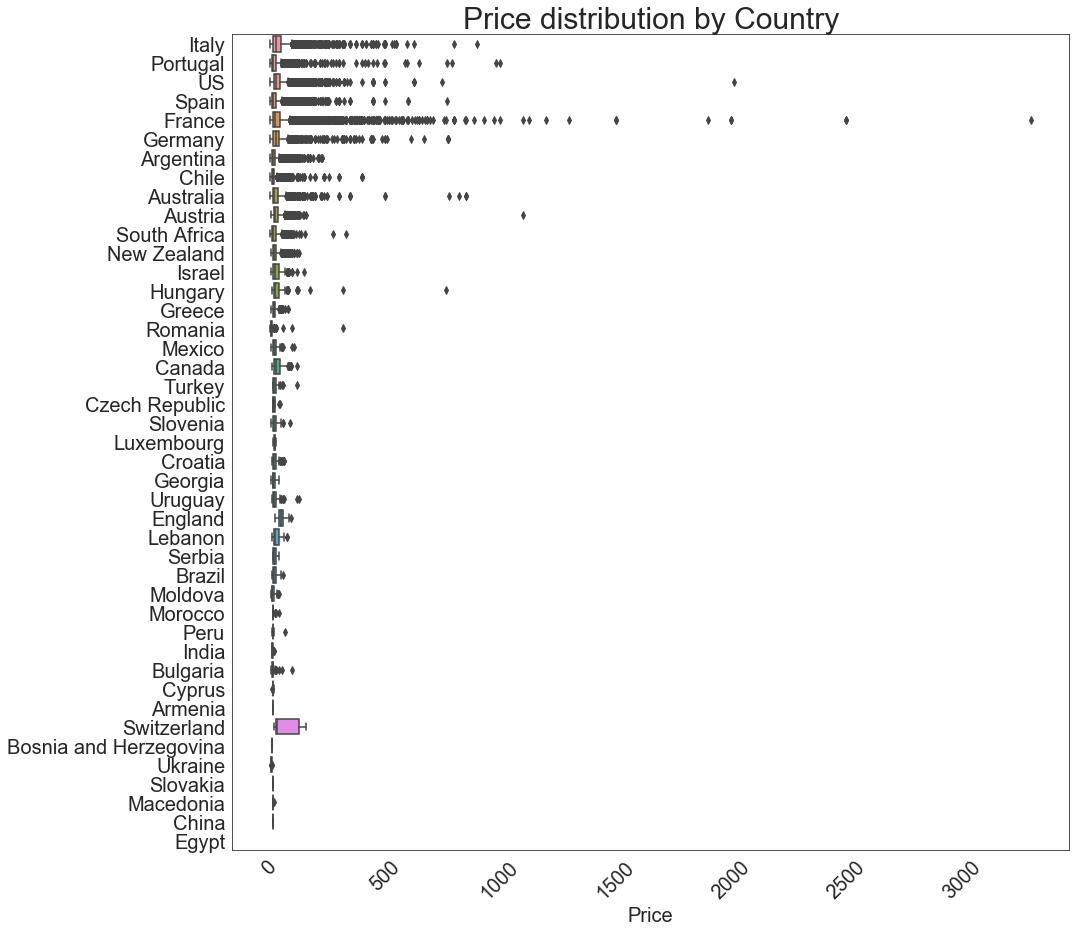

In [87]:
# plot distribution of wine by price

sns.set_style('white')
fig, ax = plt.subplots(figsize = (15,15))
chart = sns.boxplot(y='country', x='price', data=wine, ax=ax)
plt.xticks(rotation=45)
plt.title("Price distribution by Country", fontsize=30)
plt.xlabel('Price', fontsize=20)
plt.ylabel("", fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

<h3>There are only a handful of wines (mostly from France) that cost more than 800 dollars. I'm going to remove those outliers from the dataset.</h3>

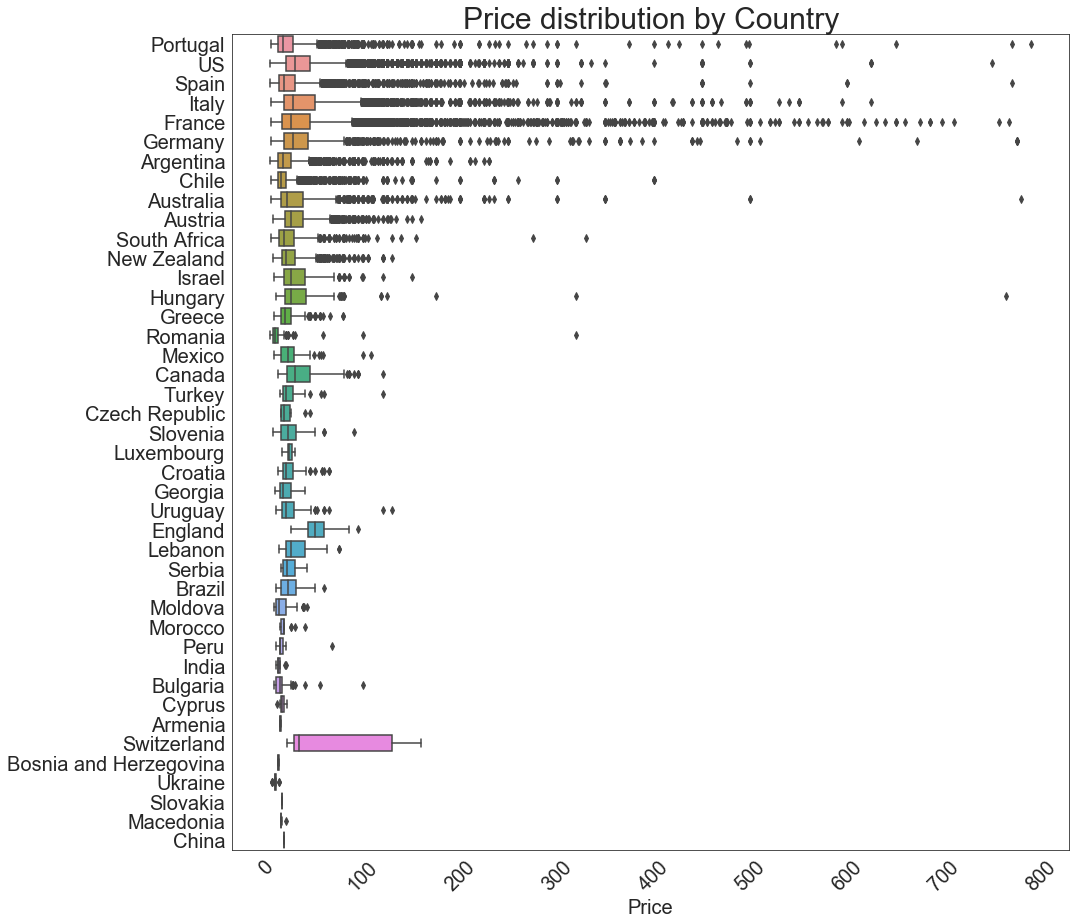

In [89]:
df_minus_outliers = wine[wine['price'] < 800]

sns.set_style('white')
fig, ax = plt.subplots(figsize = (15,15))
chart = sns.boxplot(y='country', x='price', data=df_minus_outliers, ax=ax)
plt.xticks(rotation=45)
plt.title("Price distribution by Country", fontsize=30)
plt.xlabel('Price', fontsize=20)
plt.ylabel("", fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [90]:
# What is the correlation between points and price?
wine.corr()

,points,price
points,1.000000,0.416566
price,0.416566,1.000000


<h2>Countries with the highest and lowest average price</h2>

In [99]:
# find average price by country
df_avg_price = wine.groupby('country', as_index=False)['price'].mean().sort_values(by = 'price', ascending = False)
# drop missing price values
df_avg_price = df_avg_price.dropna(axis=0)

# show countries with most expensive wine on average
df_avg_price.head(5)

,country,price
38,Switzerland,72.833333
14,England,52.677966
17,Germany,43.460789
19,Hungary,42.234375
15,France,41.994105


In [100]:
# show countries with cheapest wine on average
df_avg_price.tail(5)

,country,price
6,Bulgaria,14.840909
1,Armenia,14.500000
20,India,13.750000
4,Bosnia and Herzegovina,12.500000
41,Ukraine,9.214286


In [101]:
# average price by country with outliers removed
df_avg_price_minus_outliers = df_minus_outliers.groupby('country', as_index=False)['price'].mean().sort_values(by = 'price', ascending = False)
# drop missing price values
df_avg_price_minus_outliers = df_avg_price_minus_outliers.dropna(axis=0)

# show countries with most expensive wine on average
df_avg_price_minus_outliers.head(5)

,country,price
37,Switzerland,72.833333
13,England,52.677966
16,Germany,43.460789
18,Hungary,42.234375
14,France,40.168593


<h4>No change in ranking with price outliers removed.</h4>

In [110]:
wine['winery'].value_counts()

Wines & Winemakers       211
Williams Selyem          204
Testarossa               201
DFJ Vinhos               200
Louis Latour             192
                        ... 
Marco Bonfante             1
Roccolo del Lago           1
Vignobles Arno             1
ChÌ¢teau Haut Laulion      1
Villa Melnik               1
Name: winery, Length: 16755, dtype: int64

In [111]:
# show best and worst wineries based on average points
df_winery_points = wine.groupby('winery', as_index=False)['points'].mean().sort_values(by = 'points', ascending = False)
df_winery_points.head(10)

,winery,points
654,Araujo,98.000000
11893,Ovid,97.000000
8881,J.L. Chave,97.000000
7797,Gandona,97.000000
14900,Tenuta dell'Ornellaia,96.888889
13618,Salon,96.800000
3950,ChÌ¢teau PÌ©trus,96.666667
10043,Lewis,96.000000
8590,Hors Categorie,96.000000
13925,Semper,96.000000


In [112]:
df_winery_points.tail(10)

,winery,points
7434,Fioravante,80.0
13008,Rai,80.0
11459,MÌ_nnle,80.0
11487,NamastÌ© Vineyards,80.0
7143,Familia MontaÌ±a,80.0
13407,Rojo Mojo,80.0
7346,Fiesta Winery,80.0
11624,Nine x Nine,80.0
15714,Vega Murillo,80.0
2211,Capay Valley,80.0


In [114]:
corr = wine.corr()
corr

,points,price
points,1.000000,0.416566
price,0.416566,1.000000


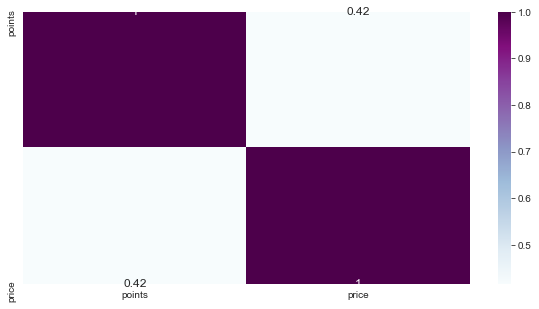

In [133]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr, cmap='BuPu', annot=True, annot_kws={"size": 12})

<h4>Points and price are moderately correlated.</h4>

In [135]:
# Is there are correlation between points and the length of the description?
length_desc = wine.assign(description_length = wine['description'].apply(len))
length_desc.head()

,country,description,points,price,province,taster_name,title,variety,winery,description_length
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Kerin OÛªKeefe,Nicosia 2013 VulkÌÊ Bianco (Etna),White Blend,Nicosia,172
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,227
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,186
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,199
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,249


In [137]:
corr = length_desc.corr()
corr

,points,price,description_length
points,1.000000,0.416566,0.562598
price,0.416566,1.000000,0.252335
description_length,0.562598,0.252335,1.000000


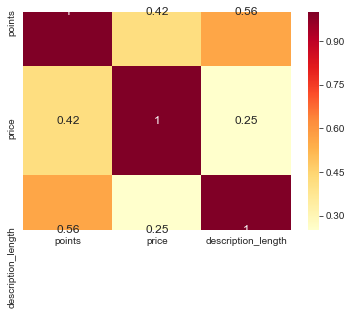

In [138]:
sns.heatmap(corr, cmap='YlOrRd', annot=True, annot_kws={"size": 12})

<h4>A little stronger correlation between points and description length, indicating that a taster might be inclined to write more about a more highly rated wine.</h4>

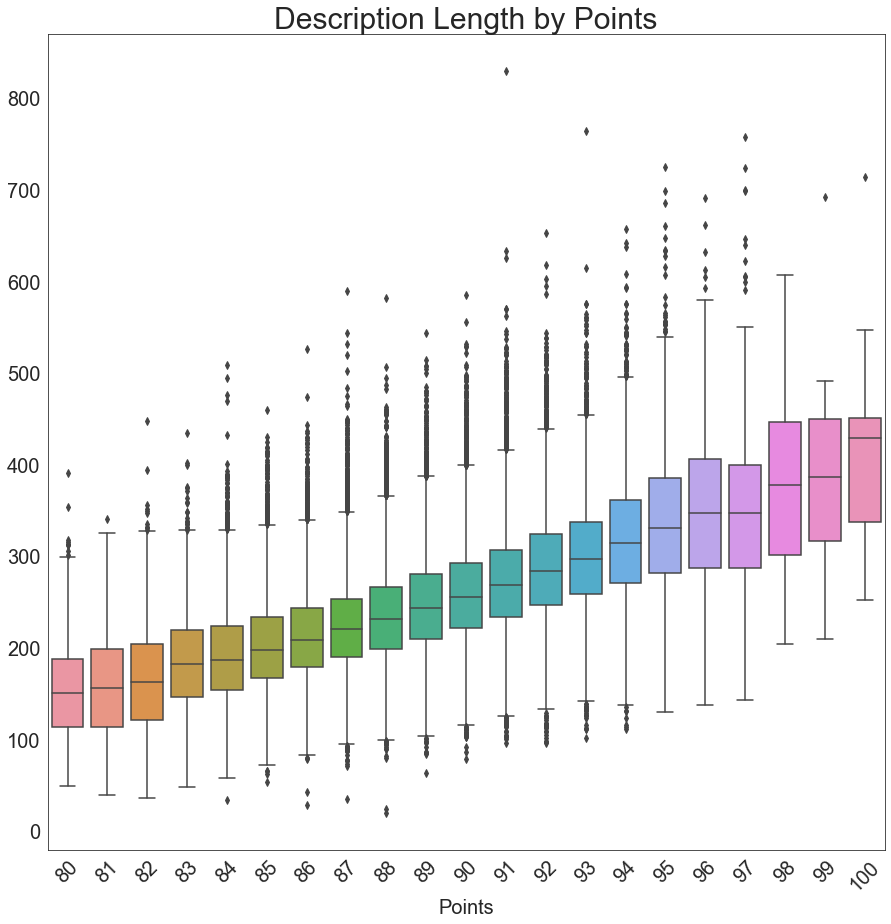

In [140]:
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(x='points', y='description_length', data=length_desc)
plt.xticks(rotation=45)
plt.title("Description Length by Points", fontsize=30)
plt.xlabel('Points', fontsize=20)
plt.ylabel("", fontsize=15)
plt.tick_params(labelsize=20)
plt.show()